/tmp/ipython-input-1136123457.py:10: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(start='2025-10-01', periods=1000, freq='T')
/tmp/ipython-input-1136123457.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analysis = df.groupby('Congestion_Level')[['Latency_ms', 'Packet_Loss_%']].mean()


Average Service Quality Metrics by Congestion Level:
                  Latency_ms  Packet_Loss_%
Congestion_Level                           
Low                36.029822       0.074729
Medium             50.293115       0.102724
High               65.479332       0.225844


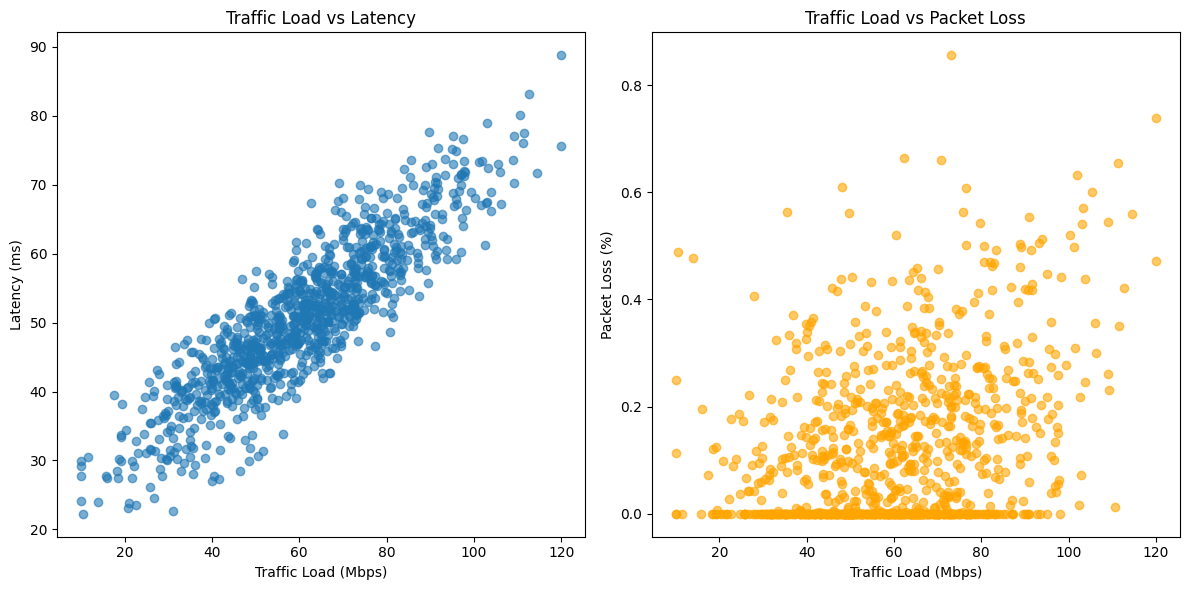


Correlation between traffic load and latency: 0.886
Correlation between traffic load and packet loss: 0.322


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate network data
# ----------------------------------
np.random.seed(42)

# Simulate 1000 data points
time = pd.date_range(start='2025-10-01', periods=1000, freq='T')

# Network traffic in Mbps (simulate heavy and light traffic)
traffic_load = np.random.normal(60, 20, 1000).clip(10, 120)

# Simulate latency (in ms): higher traffic → higher latency
latency = 20 + 0.5 * traffic_load + np.random.normal(0, 5, 1000)

# Simulate packet loss (%): increases exponentially with heavy traffic
packet_loss = np.clip(np.exp((traffic_load - 80) / 20) / 10 + np.random.normal(0, 0.2, 1000), 0, 10)

# Combine into DataFrame
df = pd.DataFrame({
    'Time': time,
    'Traffic_Load_Mbps': traffic_load,
    'Latency_ms': latency,
    'Packet_Loss_%': packet_loss
})

# Step 2: Analyze congestion effect
# ----------------------------------
# Define congestion threshold
df['Congestion_Level'] = pd.cut(df['Traffic_Load_Mbps'],
                                bins=[0, 40, 80, 120],
                                labels=['Low', 'Medium', 'High'])

# Average metrics per congestion level
analysis = df.groupby('Congestion_Level')[['Latency_ms', 'Packet_Loss_%']].mean()
print("Average Service Quality Metrics by Congestion Level:")
print(analysis)

# Step 3: Visualize relationships
# ----------------------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Traffic_Load_Mbps'], df['Latency_ms'], alpha=0.6)
plt.title('Traffic Load vs Latency')
plt.xlabel('Traffic Load (Mbps)')
plt.ylabel('Latency (ms)')

plt.subplot(1, 2, 2)
plt.scatter(df['Traffic_Load_Mbps'], df['Packet_Loss_%'], alpha=0.6, color='orange')
plt.title('Traffic Load vs Packet Loss')
plt.xlabel('Traffic Load (Mbps)')
plt.ylabel('Packet Loss (%)')

plt.tight_layout()
plt.show()

# Step 4: Interpretation
# ----------------------------------
correlation_latency = df['Traffic_Load_Mbps'].corr(df['Latency_ms'])
correlation_loss = df['Traffic_Load_Mbps'].corr(df['Packet_Loss_%'])

print("\nCorrelation between traffic load and latency:", round(correlation_latency, 3))
print("Correlation between traffic load and packet loss:", round(correlation_loss, 3))
